In [1]:
import PIL.Image
%load_ext autoreload
%autoreload 2

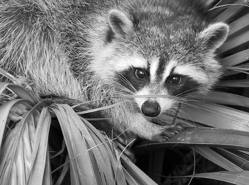

In [2]:
import numpy as np
import scipy
import PIL.Image as Image
data = np.asarray(Image.open("PIXNIO-28860-1536x1152.jpg").convert('L').resize((249,185)))
im = Image.fromarray(data)
display(im)

first truncation where energy loss less than one percent 9
image with all PCA components


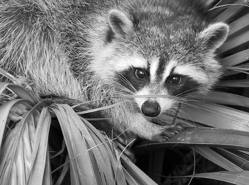

image with 120 PCA components


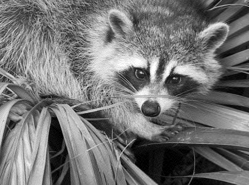

image with 50 PCA components


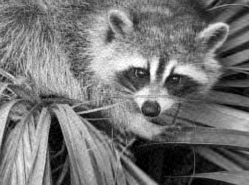

image with 10 PCA components


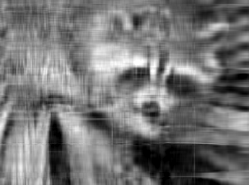

Average L2 metric between the data and reconstructed data using PCA with covar :22.81340764513778
Average L2 metric between the data and reconstructed data using PCA with cent data :22.81340764513778


In [3]:
import model
import matplotlib.pyplot as plt
pca = model.ReversiblePCA()
data_t = data.T
pca.fit(data_t)
import energy
first_where_loss_less_than_one_percent = energy.first_losses_less_than(pca.eigen_values,0.01)
print(f"first truncation where energy loss less than one percent {first_where_loss_less_than_one_percent}")
comp_counts = [-1, 120, 50, 10]
def f(x):
    return pca.reverse_transform(pca.transform(data_t,x)).T
for x in comp_counts:
    if x == -1:
        print(f"image with all PCA components")
        im = Image.fromarray(f(x)).convert('L')
    else:
        print(f"image with {x} PCA components")
        im = Image.fromarray(f(x)).convert('L')
    display(im)
pca.fit(data_t)
print(f"Average L2 metric between the data and reconstructed data using PCA with covar :{np.mean(np.sqrt(np.mean(np.square(data_t - f(10).T),1)))}")
pca.fit(data_t, False)
print(f"Average L2 metric between the data and reconstructed data using PCA with cent data :{np.mean(np.sqrt(np.mean(np.square(data_t - f(10).T),1)))}")